In [18]:
!pip install selenium
!pip install webdriver-manager


# Web scrapping

In [ ]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

url = 'https://levi.in/collections/men-jeans'
driver.get(url)

# Wait until products load
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, 'a.mmc-card-image'))
    )
except:
    print("Products did not load in time.")
    driver.quit()

# Infinite scroll until all products load
previous_count = 0
scroll_attempts = 0
max_scroll_attempts = 10

while scroll_attempts < max_scroll_attempts:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    current_count = len(driver.find_elements(By.CSS_SELECTOR, 'div.mmc-product-card'))

    if current_count == previous_count:
        print("All products loaded.")
        break
    else:
        previous_count = current_count
        scroll_attempts += 1

print(f"\nTotal Products Found: {previous_count}\n")

product_data = []
product_cards = driver.find_elements(By.CSS_SELECTOR, 'div.mmc-product-card')

for card in product_cards:
    try:
        title = card.find_element(By.CSS_SELECTOR, 'a.mmc-card-title').text.strip()
    except:
        title = "N/A"

    try:
        link = card.find_element(By.CSS_SELECTOR, 'a.mmc-card-image').get_attribute('href')
    except:
        link = "N/A"

    try:
        sale_price = card.find_element(By.CSS_SELECTOR, 'span.mmc-price-sale').text.strip().replace('₹', '').replace(',', '')
    except:
        sale_price = "0"

    try:
        regular_price = card.find_element(By.CSS_SELECTOR, 'span.mmc-price-compare').text.strip().replace('₹', '').replace(',', '')
    except:
        regular_price = sale_price  # Sometimes regular price may be missing

    try:
        image = card.find_element(By.CSS_SELECTOR, 'a.mmc-card-image img').get_attribute('src')
    except:
        image = "N/A"

    # Clean and convert sale price
    sale_price_clean = sale_price if sale_price.strip() != '' else '0'
    regular_price_clean = regular_price if regular_price.strip() != '' else sale_price_clean

    product_data.append({
        'Title': title,
        'Sale Price': int(sale_price_clean),
        'Regular Price': int(regular_price_clean),
        'Image URL': image,
        'Product Link': link
    })


driver.quit()

df = pd.DataFrame(product_data)
df.drop_duplicates(subset='Product Link', inplace=True)  
df.to_csv('levis_mens_jeans.csv', index=False)
print("Data saved to 'levis_mens_jeans.csv' successfully.")



Total Products Found: 528

Data saved to 'levis_mens_jeans.csv' successfully.


# Data Cleaning

In [ ]:
import pandas as pd

file_path = 'C:/Users/USER/Desktop/Project/levis_jeans/levis_mens_jeans.csv'
df = pd.read_csv(file_path)
print(" Initial Data Snapshot:")
print(df.head())
print("\n Dataset Info:")
print(df.info())
print("\n Duplicates Found:", df.duplicated().sum())
df = df.drop_duplicates()
print("\n Missing Values Per Column:")
print(df.isnull().sum())
df = df.dropna(subset=['Sale Price', 'Regular Price'])
cleaned_file_path = 'C:/Users/USER/Desktop/Project/levis_jeans/levis_mens_jeans_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"\n Cleaned data saved to: {cleaned_file_path}")


🔍 Initial Data Snapshot:
                                               Title  Sale Price  \
0  Men'S 541 Blue Athletic Tapered Fit Mid Rise J...        1699   
1            Men'S 578 Navy Baggy Fit Mid Rise Jeans        1999   
2   Men'S 513 Black Slim Straight Fit Mid Rise Jeans        1699   
3              Men'S 527 Slim Bootcut Fit Navy Jeans        2449   
4                 Men'S 511 Slim Fit Dark Blue Jeans        1849   

   Regular Price                                          Image URL  \
0           3399  https://levi.in/cdn/shop/files/A66350040_01_St...   
1           3999  https://levi.in/cdn/shop/files/8d4abae0065e128...   
2           3399  https://levi.in/cdn/shop/files/236770347_05_St...   
3           4899  https://levi.in/cdn/shop/files/9f8238e71d854b6...   
4           3699  https://levi.in/cdn/shop/files/531cf0bed572f35...   

                                        Product Link  
0  https://levi.in/collections/men-jeans/products...  
1  https://levi.in/collection

# Basic Analysis

📊 Summary Statistics:
        Sale Price  Regular Price  Discount (%)
count   528.000000     528.000000    528.000000
mean   2322.570076    4753.943182     51.015563
std     818.571644    1675.651120      3.007990
min    1279.000000    2699.000000     50.005001
25%    1719.000000    3499.000000     50.009806
50%    2049.000000    4399.000000     50.012503
75%    2699.000000    5399.000000     50.015156
max    4999.000000    9999.000000     60.018756


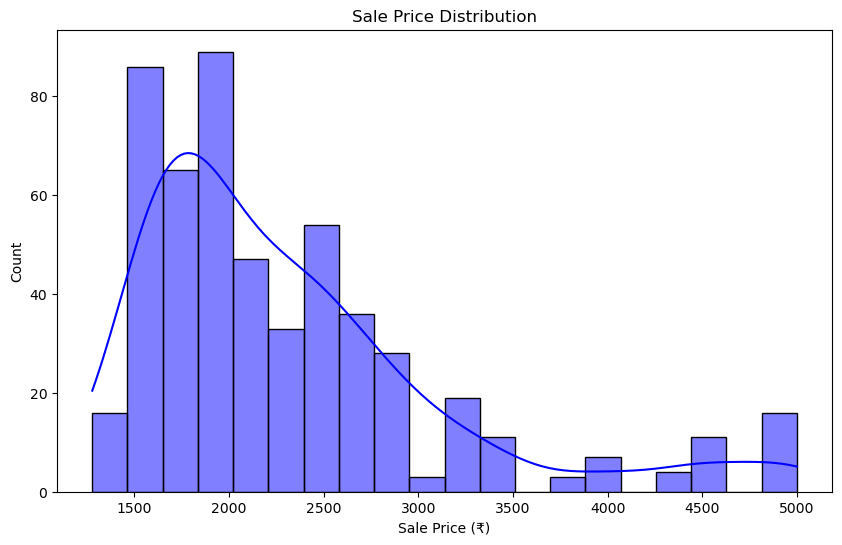

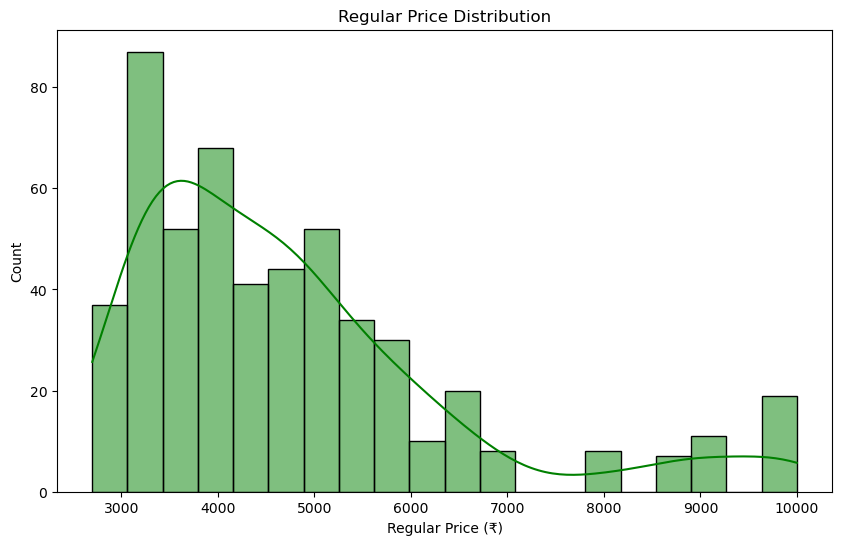

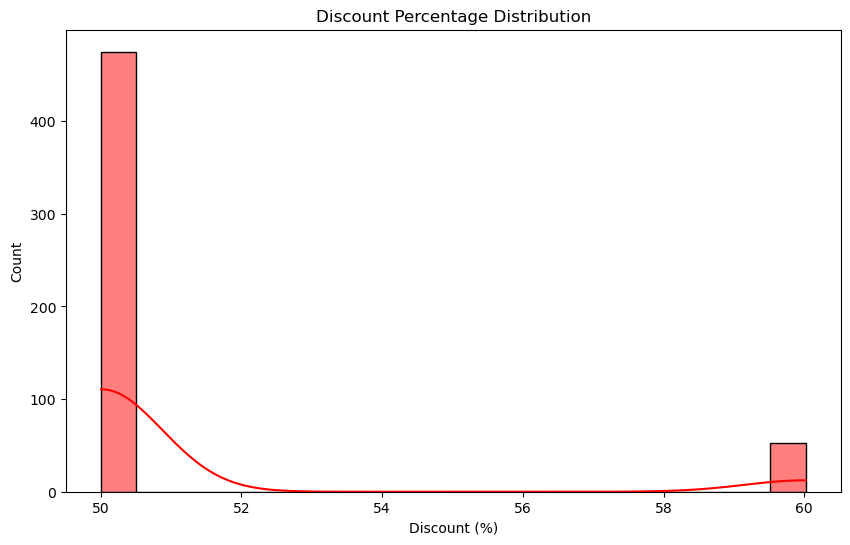


🏆 Top 10 Most Frequent Products:
Title
Men'S 511 Blue Slim Fit Mid Rise Jeans                  72
Men'S 512 Blue Slim Tapered Fit Mid Rise Jeans          46
Men'S 511 Navy Blue Slim Fit Mid Rise Jeans             26
Men'S 512 Indigo Slim Tapered Fit Mid Rise Jeans        23
Men'S 511 Indigo Slim Fit Mid Rise Jeans                20
Men'S 511 Black Slim Fit Mid Rise Jeans                 17
Men'S 511 Light Blue Slim Fit Mid Rise Jeans            15
Men'S 511 Dark Blue Slim Fit Mid Rise Jeans             15
Men'S 512 Black Slim Tapered Fit Mid Rise Jeans         12
Men'S 512 Light Blue Slim Tapered Fit Mid Rise Jeans     9
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_14612\2571665984.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


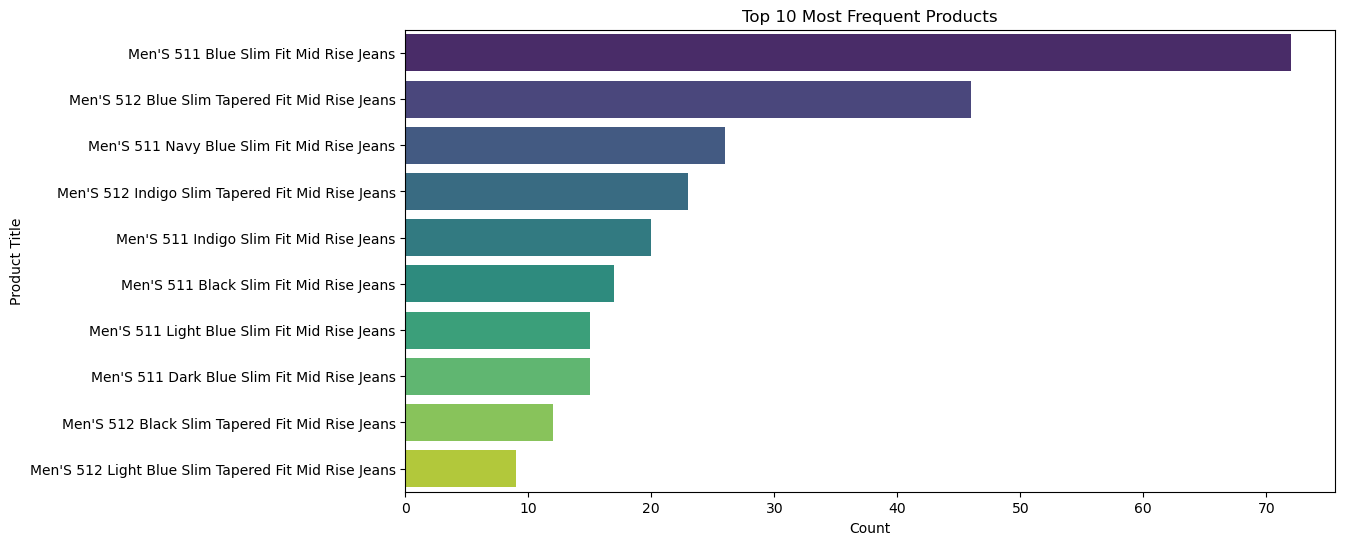

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/USER/Desktop/Project/levis_jeans/levis_mens_jeans_cleaned.csv'
df = pd.read_csv(file_path)
df['Discount (%)'] = ((df['Regular Price'] - df['Sale Price']) / df['Regular Price']) * 100
print(" Summary Statistics:")
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Sale Price'], bins=20, kde=True, color='blue')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price (₹)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Regular Price'], bins=20, kde=True, color='green')
plt.title('Regular Price Distribution')
plt.xlabel('Regular Price (₹)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Discount (%)'], bins=20, kde=True, color='red')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Count')
plt.show()

# Top 10 most common products
top_products = df['Title'].value_counts().head(10)
print("\n Top 10 Most Frequent Products:")
print(top_products)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Count')
plt.ylabel('Product Title')
plt.show()


In [ ]:
import pandas as pd
import re

file_path = 'C:/Users/USER/Desktop/Project/levis_jeans/levis_mens_jeans_cleaned.csv'
df = pd.read_csv(file_path)
df['Jeans Style'] = df['Title'].apply(lambda x: re.findall(r'\b\d{3}\b', x))
all_styles = df['Jeans Style'].explode().dropna().unique()
all_styles = sorted(all_styles)
print("👖 Distinct Jeans Styles Found in the Dataset:")
print(all_styles)

👖 Distinct Jeans Styles Found in the Dataset:
['501', '505', '511', '512', '513', '517', '527', '541', '550', '555', '568', '578', '655']


# Advance Analysis

Distinct Jeans Styles:
Jeans Style
511      229
512      159
513       36
Other     18
541       17
65504     15
505       11
527       10
550        8
555        7
568        5
501        5
517        4
578        2
655        2
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_14612\1739317659.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Jeans Style', y='Sale Price', palette='Set2')


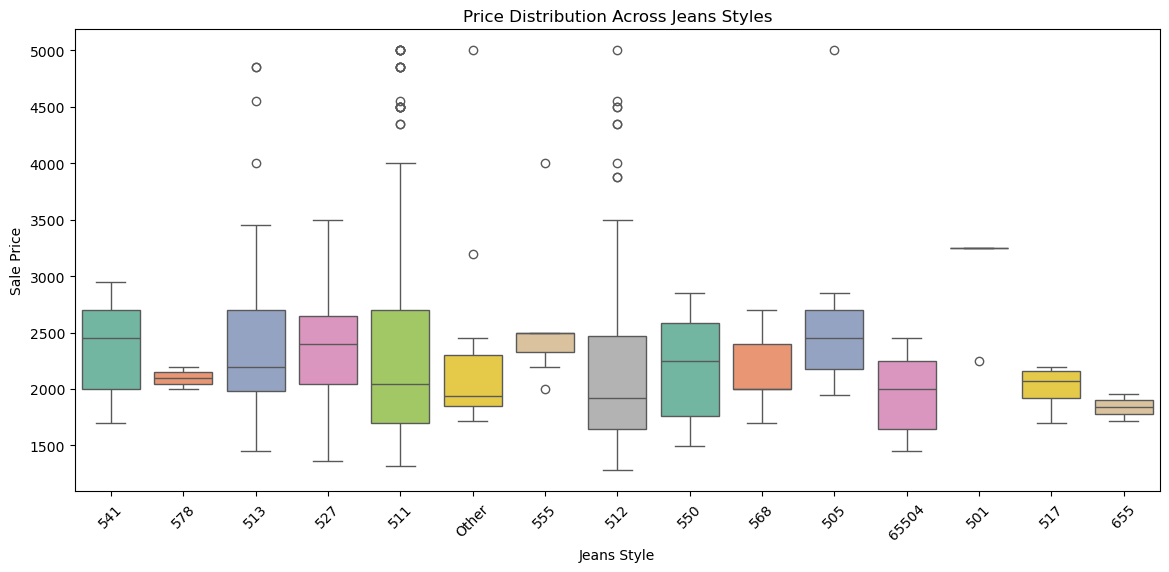

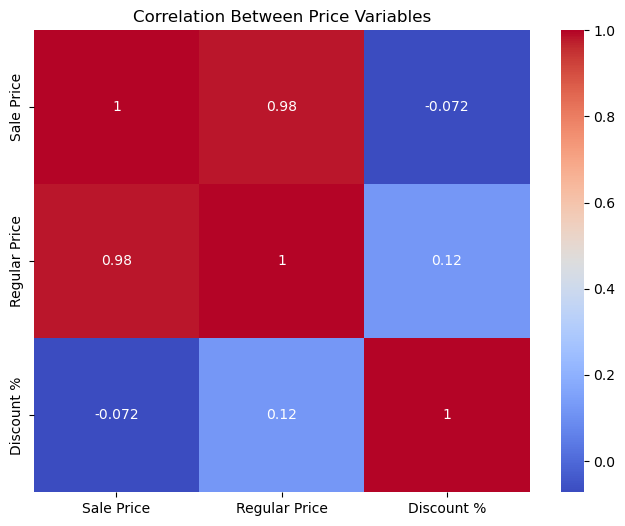

C:\Users\USER\AppData\Local\Temp\ipykernel_14612\1739317659.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('Discount %', ascending=False), x='Jeans Style', y='Discount %', palette='Set1')


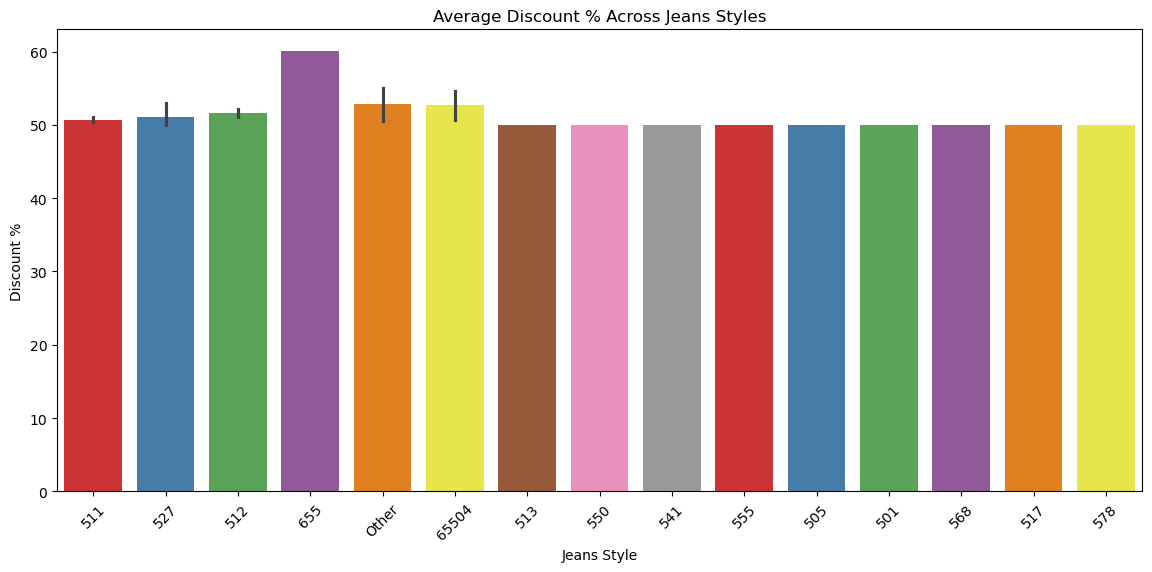

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('C:/Users/USER/Desktop/Project/levis_jeans/levis_mens_jeans_cleaned.csv')
df['Jeans Style'] = df['Title'].apply(lambda x: re.findall(r'\b(501|505|511|512|513|517|527|541|550|555|568|578|655|65504)\b', x))
df['Jeans Style'] = df['Jeans Style'].apply(lambda x: x[0] if x else 'Other')
print("Distinct Jeans Styles:")
print(df['Jeans Style'].value_counts())

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Jeans Style', y='Sale Price', palette='Set2')
plt.xticks(rotation=45)
plt.title('Price Distribution Across Jeans Styles')
plt.show()

if 'Discount %' not in df.columns:
    df['Discount %'] = ((df['Regular Price'] - df['Sale Price']) / df['Regular Price']) * 100
    df['Discount %'] = df['Discount %'].round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Sale Price', 'Regular Price', 'Discount %']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Price Variables')
plt.show()


plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values('Discount %', ascending=False), x='Jeans Style', y='Discount %', palette='Set1')
plt.xticks(rotation=45)
plt.title('Average Discount % Across Jeans Styles')
plt.show()


In [ ]:
import scipy.stats as stats

df['Price Category'] = pd.qcut(df['Sale Price'], q=3, labels=['Low', 'Medium', 'High'])

low_group = df[df['Price Category'] == 'Low']['Discount %']
medium_group = df[df['Price Category'] == 'Medium']['Discount %']
high_group = df[df['Price Category'] == 'High']['Discount %']

anova_result = stats.f_oneway(low_group, medium_group, high_group)

print("ANOVA Test Result:")
print(f"F-Statistic: {anova_result.statistic:.2f}")
print(f"P-Value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("\n Significant difference found between price categories.")
else:
    print("\n No significant difference found between price categories.")


ANOVA Test Result:
F-Statistic: 3.42
P-Value: 0.0335

✅ Significant difference found between price categories.


# Clustering

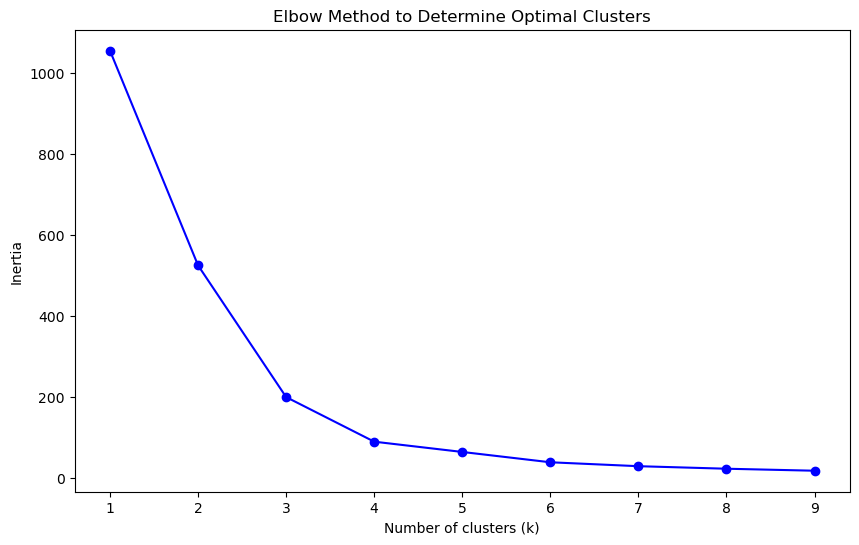

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

features = df[['Sale Price', 'Discount %']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()


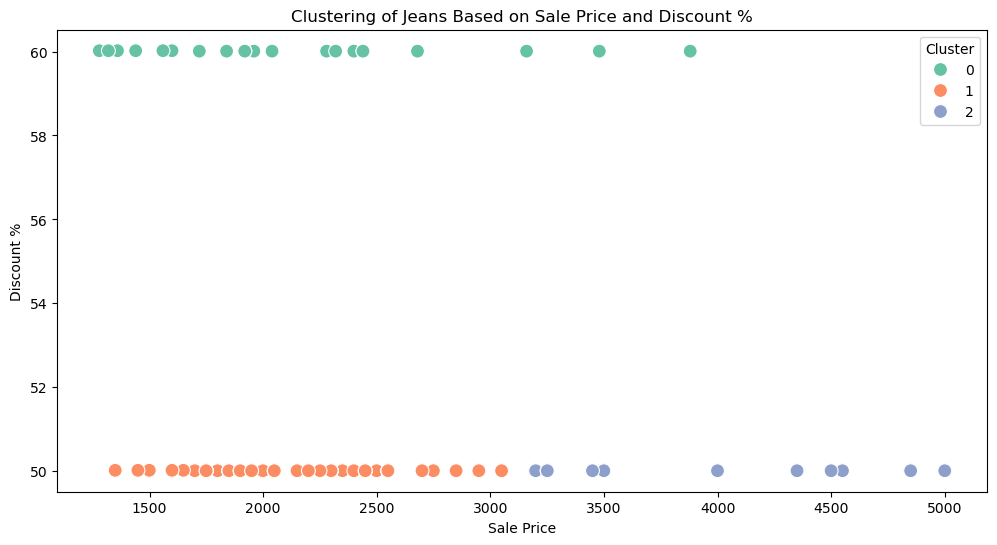

Cluster
0     53
1    411
2     64
Name: count, dtype: int64


In [ ]:
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sale Price', y='Discount %', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Jeans Based on Sale Price and Discount %')
plt.show()

print(df['Cluster'].value_counts().sort_index())


Cluster Profiling Summary:
   Cluster  Avg Sale Price  Min Sale Price  Max Sale Price  Avg Regular Price  \
0        0     2146.924528            1279            3879        5368.811321   
1        1     2075.036496            1349            3049        4151.072993   
2        2     4057.656250            3199            4999        8116.312500   

   Min Regular Price  Max Regular Price  Avg Discount %  Min Discount %  \
0               3199               9699       60.011509           60.01   
1               2699               6099       50.012287           50.01   
2               6399               9999       50.010000           50.01   

   Max Discount %  Product Count  
0           60.02             53  
1           50.02            411  
2           50.01             64  


C:\Users\USER\AppData\Local\Temp\ipykernel_14612\1385039554.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Product Count', palette='Set2')


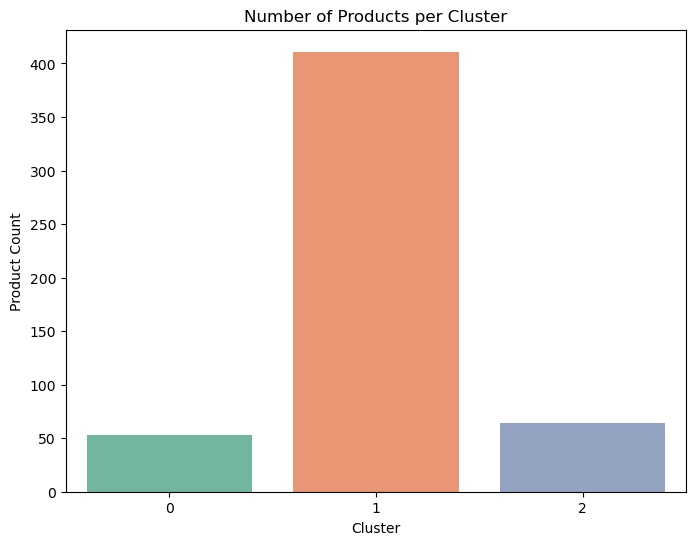

In [ ]:
cluster_summary = df.groupby('Cluster').agg({
    'Sale Price': ['mean', 'min', 'max'],
    'Regular Price': ['mean', 'min', 'max'],
    'Discount %': ['mean', 'min', 'max'],
    'Title': 'count'
}).reset_index()

cluster_summary.columns = [
    'Cluster',
    'Avg Sale Price', 'Min Sale Price', 'Max Sale Price',
    'Avg Regular Price', 'Min Regular Price', 'Max Regular Price',
    'Avg Discount %', 'Min Discount %', 'Max Discount %',
    'Product Count'
]

print("\nCluster Profiling Summary:")
print(cluster_summary)

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Product Count', palette='Set2')
plt.title('Number of Products per Cluster')
plt.show()


Cluster Profiling Summary:
   Cluster  Avg Sale Price  Min Sale Price  Max Sale Price  Avg Regular Price  \
0        0     2146.924528            1279            3879        5368.811321   
1        1     2075.036496            1349            3049        4151.072993   
2        2     4057.656250            3199            4999        8116.312500   

   Min Regular Price  Max Regular Price  Avg Discount %  Min Discount %  \
0               3199               9699       60.011509           60.01   
1               2699               6099       50.012287           50.01   
2               6399               9999       50.010000           50.01   

   Max Discount %  Product Count  
0           60.02             53  
1           50.02            411  
2           50.01             64  


C:\Users\USER\AppData\Local\Temp\ipykernel_14612\3783000993.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Product Count', palette='Set2')


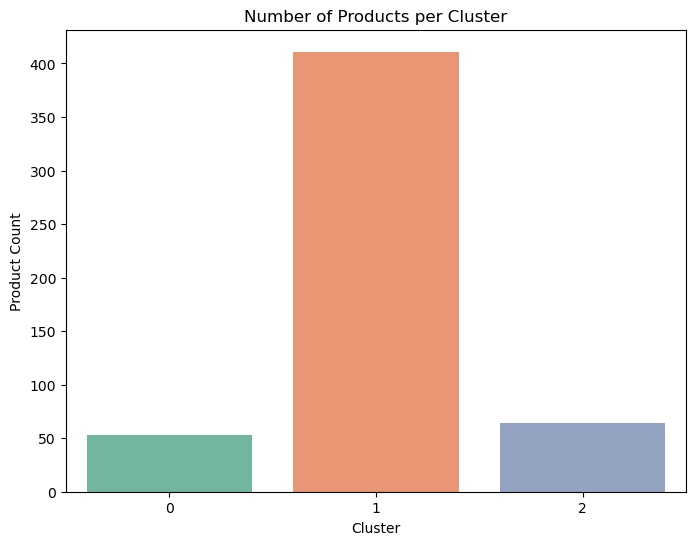

C:\Users\USER\AppData\Local\Temp\ipykernel_14612\3783000993.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Avg Sale Price', palette='Set1')


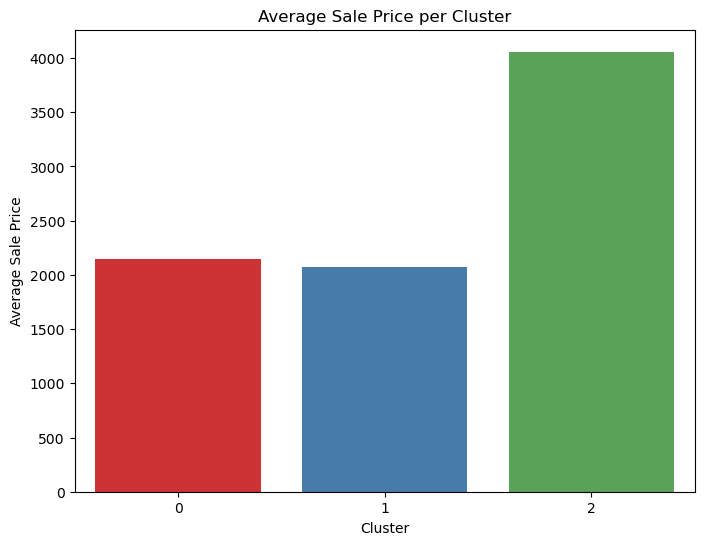

C:\Users\USER\AppData\Local\Temp\ipykernel_14612\3783000993.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='Cluster', y='Avg Discount %', palette='Set3')


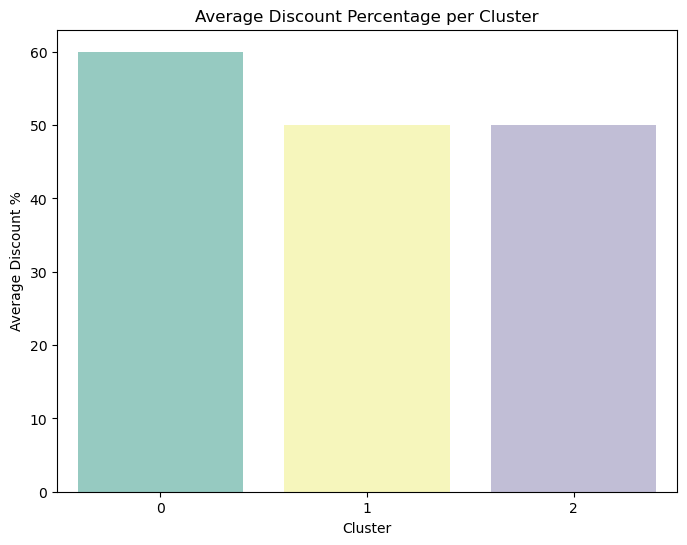

In [ ]:

cluster_summary = df.groupby('Cluster').agg({
    'Sale Price': ['mean', 'min', 'max'],
    'Regular Price': ['mean', 'min', 'max'],
    'Discount %': ['mean', 'min', 'max'],
    'Title': 'count'
}).reset_index()

cluster_summary.columns = [
    'Cluster',
    'Avg Sale Price', 'Min Sale Price', 'Max Sale Price',
    'Avg Regular Price', 'Min Regular Price', 'Max Regular Price',
    'Avg Discount %', 'Min Discount %', 'Max Discount %',
    'Product Count'
]

print("\nCluster Profiling Summary:")
print(cluster_summary)

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Product Count', palette='Set2')
plt.title('Number of Products per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Product Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Avg Sale Price', palette='Set1')
plt.title('Average Sale Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sale Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_summary, x='Cluster', y='Avg Discount %', palette='Set3')
plt.title('Average Discount Percentage per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Discount %')
plt.show()



# Business Recommendations

In [ ]:
print("\n Business Recommendations Based on Clustering:\n")

recommendations = {
    0: {
        'Segment': 'Budget Segment',
        'Target Audience': 'Price-sensitive customers, students, bulk buyers',
        'Actions': [
            'Provide frequent discounts and bundle offers',
            'Focus marketing on clearance sales and festive promotions',
            'Implement flash sales and volume-based incentives'
        ]
    },
    1: {
        'Segment': 'Value-for-Money Segment',
        'Target Audience': 'Quality-conscious, value-seeking buyers',
        'Actions': [
            'Emphasize product quality, comfort, and fit',
            'Offer loyalty rewards and cashback offers',
            'Position as "Best Value" in marketing campaigns'
        ]
    },
    2: {
        'Segment': 'Premium Segment',
        'Target Audience': 'Brand-loyal, premium customers',
        'Actions': [
            'Limit discounts to retain premium image',
            'Launch exclusive collections and premium lookbooks',
            'Leverage influencer marketing and storytelling on sustainability'
        ]
    }
}

for cluster_id, rec in recommendations.items():
    print(f"Cluster {cluster_id}: {rec['Segment']}")
    print(f"Target Audience: {rec['Target Audience']}")
    print("Recommended Actions:")
    for action in rec['Actions']:
        print(f" - {action}")
    print('-' * 50)


📊 Business Recommendations Based on Clustering:

Cluster 0: Budget Segment
Target Audience: Price-sensitive customers, students, bulk buyers
Recommended Actions:
 - Provide frequent discounts and bundle offers
 - Focus marketing on clearance sales and festive promotions
 - Implement flash sales and volume-based incentives
--------------------------------------------------
Cluster 1: Value-for-Money Segment
Target Audience: Quality-conscious, value-seeking buyers
Recommended Actions:
 - Emphasize product quality, comfort, and fit
 - Offer loyalty rewards and cashback offers
 - Position as "Best Value" in marketing campaigns
--------------------------------------------------
Cluster 2: Premium Segment
Target Audience: Brand-loyal, premium customers
Recommended Actions:
 - Limit discounts to retain premium image
 - Launch exclusive collections and premium lookbooks
 - Leverage influencer marketing and storytelling on sustainability
--------------------------------------------------
